# Panadas DataFram and Series Data Types

First import the `pandas` package and give it an alias `pd`.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# ?pd.set_option

# Introduction

pandas uses DataFrame to represent tabular data, such as data stored in spreadsheets or databases. You can view a DataFrame as a data table with a set of methods that manipulate or process the data in the data table.

## DataFrame
A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data and more) in columns. It is similar to a spreadsheet, a SQL table or the data.frame in R.

![DataFrame](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

To manually store data in a table, create a DataFrame. When using a Python dictionary of lists, the dictionary keys will be used as column headers and the values in each list as columns of the DataFrame.

For example, we can create a DataFrame for the Clemson Tiger playes.

In [3]:
df = pd.DataFrame({
    "Name": ["Hunter Helms", "Trevor Lawrence", "Drew Swinney"],
    "Position": ["QB", "QB", "WR"],
    "Height": [6.1, 6.2, 5.10],
    "Weight": [210, 220, 180],
    "Class": ["FR", "JR", "SO"]
})
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,Name,Position,Height,Weight,Class
0,Hunter Helms,QB,6.1,210,FR
1,Trevor Lawrence,QB,6.2,220,JR
2,Drew Swinney,WR,5.1,180,SO


## Series

A __Series__ is a `one-dimensional labeled ndarray` that can `hold any data type`. Each column in a `DataFrame` is a `Series`.

![Series](https://pandas.pydata.org/docs/_images/01_table_series.svg)

In [4]:
pos = df["Position"]
print(type(pos))
pos

<class 'pandas.core.series.Series'>


0    QB
1    QB
2    WR
Name: Position, dtype: object

In [5]:
print("Index of pos:", "\n\ttype =", type(pos.index), "\n\tvalue =", pos.index)
print("Value of pos:", "\n\ttype =", type(pos.values), "\n\tvalue =", pos.values)

Index of pos: 
	type = <class 'pandas.core.indexes.range.RangeIndex'> 
	value = RangeIndex(start=0, stop=3, step=1)
Value of pos: 
	type = <class 'numpy.ndarray'> 
	value = ['QB' 'QB' 'WR']


__Series__ extends the funcationality of `ndarray` by `adding a set of lables to index` the elements of the array.
   + Series supports both integer- and label-based indexing.
   + Many methods of the Series class extensively use index when performing operations.
   + __Series__ overrides the statistical methods from ndarray to `automatically exclude missing data` (currently represented as NaN).

###  The Series Object

The signature of the Series's construtor (i.e., the `__init__()` method) is:
```
pd.Series(
    data=None,
    index=None,
    dtype=None,
    name=None,
    copy=False,
    fastpath=False,
)
```

Read the Series documentation to find out how to create a Series object. Then answer the following questions:

1. Which command will return the documentation of the Series class?
   + help(pd.Series)
   + ?pd.Series
1. Which argument in the Series constructor is required? which is optional?
1. An object of which of the following data types can be passed into the Series constructor?
   + a Python dict
   + an ndarray
   + a scalar value (like 8)
   + a list of integers
   + a set of strings
1. If the argument of index is not provided in the Series constructor, what will be the default value?

### 1. Create a Series from an ndarray

+ If data is an ndarray, index must be the same length as data. 
+ If no index is passed, one will be created having values [0, ..., len(data) - 1].

In [6]:
# A series with label based index
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

# A series with Integer index
t = pd.Series(np.random.randn(5))

In [7]:
s

a    0.991785
b    0.504992
c   -0.224333
d    0.326855
e   -1.697792
dtype: float64

In [8]:
t

0    1.001701
1    0.484998
2    0.843033
3   -0.306996
4   -1.178918
dtype: float64

### 2. Create a Series from dicts

Series can be instantiated from dicts.

+ When the data is a dict, and an index is not passed, the Series index will be the dict keys. 
However, the oder of the index will be dependent on the version of Python and Pandas.
   + If you’re using Python version >= 3.6 and Pandas version >= 0.23, the index will be 
    ordered by the dict’s insertion order.
   + If you’re using Python < 3.6 or Pandas < 0.23, the Series index will be the 
lexically ordered list of dict keys.
+ If an index is passed, the values in data corresponding to the labels in the index will be pulled out.
   + If the index exists in the dict, the value will the one corresponding to the label in the dict.
   + If the index does not exists in the dict, the value for that index will be NaN.

In [9]:
# Examples:
d = {'a': 0., 'b': 1., 'c': 2.}
d1 = pd.Series(d)
d2 = pd.Series(d, index=['b', 'c', 'd', 'a'])

In [10]:
d

{'a': 0.0, 'b': 1.0, 'c': 2.0}

In [11]:
d1

a    0.0
b    1.0
c    2.0
dtype: float64

In [12]:
d2

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

### 3. Create Series from a Scalar

When the data argument is a scalar, the series will be populated by repeating the scalar to fill the specified index.

In [13]:
pd.Series(8, index=['a', 'b', 'c'])

a    8
b    8
c    8
dtype: int64

## Attributes and Methods

Before discussing how to use Series and DataFrame, we first enumerate their attributes and functions. We define two functions for this task.

In [14]:
import inspect
def get_class_properties(cls):
    results = []
    for a in inspect.getmembers(cls):
        if not a[0].startswith('_'):
            if not inspect.isfunction(a[1]):
                results.append(a[0])
    return results

def get_class_functions(cls):
    results = []
    for a in inspect.getmembers(cls):
        if not a[0].startswith('_'):
            if inspect.isfunction(a[1]):
                results.append(a[0])
    return results

In [15]:
get_class_properties(pd.Series)

['T',
 'array',
 'at',
 'attrs',
 'axes',
 'cat',
 'dt',
 'dtype',
 'dtypes',
 'empty',
 'hasnans',
 'iat',
 'iloc',
 'index',
 'is_monotonic',
 'is_monotonic_decreasing',
 'is_monotonic_increasing',
 'is_unique',
 'loc',
 'name',
 'nbytes',
 'ndim',
 'plot',
 'shape',
 'size',
 'sparse',
 'str',
 'values']

In [16]:
get_class_functions(pd.Series)

['abs',
 'add',
 'add_prefix',
 'add_suffix',
 'agg',
 'aggregate',
 'align',
 'all',
 'any',
 'append',
 'apply',
 'argmax',
 'argmin',
 'argsort',
 'asfreq',
 'asof',
 'astype',
 'at_time',
 'autocorr',
 'between',
 'between_time',
 'bfill',
 'bool',
 'clip',
 'combine',
 'combine_first',
 'convert_dtypes',
 'copy',
 'corr',
 'count',
 'cov',
 'cummax',
 'cummin',
 'cumprod',
 'cumsum',
 'describe',
 'diff',
 'div',
 'divide',
 'divmod',
 'dot',
 'drop',
 'drop_duplicates',
 'droplevel',
 'dropna',
 'duplicated',
 'eq',
 'equals',
 'ewm',
 'expanding',
 'explode',
 'factorize',
 'ffill',
 'fillna',
 'filter',
 'first',
 'first_valid_index',
 'floordiv',
 'ge',
 'get',
 'groupby',
 'gt',
 'head',
 'hist',
 'idxmax',
 'idxmin',
 'infer_objects',
 'interpolate',
 'isin',
 'isna',
 'isnull',
 'item',
 'items',
 'iteritems',
 'keys',
 'kurt',
 'kurtosis',
 'last',
 'last_valid_index',
 'le',
 'lt',
 'mad',
 'map',
 'mask',
 'max',
 'mean',
 'median',
 'memory_usage',
 'min',
 'mod',
 'mod

In [17]:
get_class_properties(pd.DataFrame)

['T',
 'at',
 'attrs',
 'axes',
 'columns',
 'dtypes',
 'empty',
 'from_dict',
 'from_records',
 'iat',
 'iloc',
 'index',
 'loc',
 'ndim',
 'plot',
 'shape',
 'size',
 'sparse',
 'style',
 'values']

In [18]:
get_class_functions(pd.DataFrame)

['abs',
 'add',
 'add_prefix',
 'add_suffix',
 'agg',
 'aggregate',
 'align',
 'all',
 'any',
 'append',
 'apply',
 'applymap',
 'asfreq',
 'asof',
 'assign',
 'astype',
 'at_time',
 'between_time',
 'bfill',
 'bool',
 'boxplot',
 'clip',
 'combine',
 'combine_first',
 'convert_dtypes',
 'copy',
 'corr',
 'corrwith',
 'count',
 'cov',
 'cummax',
 'cummin',
 'cumprod',
 'cumsum',
 'describe',
 'diff',
 'div',
 'divide',
 'dot',
 'drop',
 'drop_duplicates',
 'droplevel',
 'dropna',
 'duplicated',
 'eq',
 'equals',
 'eval',
 'ewm',
 'expanding',
 'explode',
 'ffill',
 'fillna',
 'filter',
 'first',
 'first_valid_index',
 'floordiv',
 'ge',
 'get',
 'groupby',
 'gt',
 'head',
 'hist',
 'idxmax',
 'idxmin',
 'infer_objects',
 'info',
 'insert',
 'interpolate',
 'isin',
 'isna',
 'isnull',
 'items',
 'iteritems',
 'iterrows',
 'itertuples',
 'join',
 'keys',
 'kurt',
 'kurtosis',
 'last',
 'last_valid_index',
 'le',
 'lookup',
 'lt',
 'mad',
 'mask',
 'max',
 'mean',
 'median',
 'melt',
 'me

### Distinctions between attributes and methods

An attribute is a variable which refers to an object being part of the data of a class (class attribute) or an instance of the class (instance attribute). 

A method is function whose scope is limited to a class (class method) or an object (instance method).

Since an attribute is an object, it can have its own set of attributes and methods. 

For example, cities.plot is an attribute of type `PlotAccessor` and we can call its methods with a form like `cities.plot.bar()`. Here `cities.plot.bar()` is a method of the `plot` attribites of object `cities`.

In contrast, `cities.item()` is a method that returns an iterable of tuples containing the (index, value) pairs from the      Series `cities`.

## Case Studies - Cities Populations

Given a Series object construct as below, answer the following questions:

```
d = {'Columbia': 129272, 'Charleston': 120083, 'Clemson': 13905}
cities = pd.Series(d, index=['Columbia', 'Clemson', 'Greenville', 'Charleston'], name='sc_cities')
```

1. What is the index of the `cities` object and what is the dtype of the element of this index?
1. How many items in the Series `cities` and what are the values?
1. Is cities.index an attribute or a method?
1. Is cities.values an attribute or a method?
1. Is cities.items an attribute or a method?
1. How to get the values in `ndarray` representation? 
1. Is cities.plot a method or an attribute?
1. Is cities.loc a method or an attribute? 
1. Is cities.items a method or an attribute?

In [19]:
d = {'Columbia': 129272, 'Charleston': 120083, 'Clemson': 13905}
cities = pd.Series(d, index=['Columbia', 'Clemson', 'Greenville', 'Charleston'], name='sc_cities')

In [20]:
cities.index

Index(['Columbia', 'Clemson', 'Greenville', 'Charleston'], dtype='object')

In [21]:
print(type(cities.loc))

<class 'pandas.core.indexing._LocIndexer'>


In [22]:
# help(cities)

In [23]:
print(type(cities.items))

<class 'method'>


In [24]:
type(cities.plot)

pandas.plotting._core.PlotAccessor

In [25]:
type(cities.items)

method

In [26]:
help(cities.items)

Help on method items in module pandas.core.series:

items() method of pandas.core.series.Series instance
    Lazily iterate over (index, value) tuples.
    
    This method returns an iterable tuple (index, value). This is
    convenient if you want to create a lazy iterator.
    
    Returns
    -------
    iterable
        Iterable of tuples containing the (index, value) pairs from a
        Series.
    
    See Also
    --------
    DataFrame.items : Iterate over (column name, Series) pairs.
    DataFrame.iterrows : Iterate over DataFrame rows as (index, Series) pairs.
    
    Examples
    --------
    >>> s = pd.Series(['A', 'B', 'C'])
    >>> for index, value in s.items():
    ...     print(f"Index : {index}, Value : {value}")
    Index : 0, Value : A
    Index : 1, Value : B
    Index : 2, Value : C



In [27]:
# cities.to_numpy()
# np.array(cities)

### Use Series 

+ The Series wraps both a sequence of values and a sequence os indices.
   + To access the values, use the `values` attribute.
   + To access the indices, use the `index` attribute.
+ The data in the Series can be accessed by the index or position of the data item.

In [28]:
# help(cities.plot)

### Series Operations
+ Series is ndarray-like. For most NumPy functions, we can replace the ndarray argument with a corresponding Series object.
+ Series is dict-like. We can get and set values by index lable.

In [29]:
# Construct the cities Series object 
poplations = {'Columbia': 129272, 'Charleston': 120083, 'Clemson': 13905}
cities = pd.Series(poplations, index=['Columbia', 'Clemson', 'Greenville', 'Charleston'])

# Access the values and index of the Series
print("Values of cities object = ", cities.values)
print("Index of cities object = ", cities.index)

# Access Series data
print("Population of Clemson = ", cities['Clemson'])
print("Population of cities[1] = ", cities[1])
print("Population of all cities:")
for c, p in cities.items():
    print(c, "\t", p)
print("Populations of the first two cities: ")
for c in cities[0:2]:
    print("\t", c)
print("Populations of the first two and the last cities:")
for c in cities[[0, 1, -1]]:
    print("\t", c)


Values of cities object =  [129272.  13905.     nan 120083.]
Index of cities object =  Index(['Columbia', 'Clemson', 'Greenville', 'Charleston'], dtype='object')
Population of Clemson =  13905.0
Population of cities[1] =  13905.0
Population of all cities:
Columbia 	 129272.0
Clemson 	 13905.0
Greenville 	 nan
Charleston 	 120083.0
Populations of the first two cities: 
	 129272.0
	 13905.0
Populations of the first two and the last cities:
	 129272.0
	 13905.0
	 120083.0


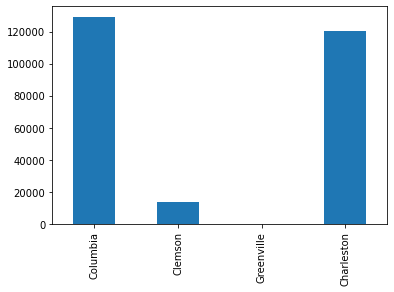

In [30]:
# plot
cities.plot.bar()

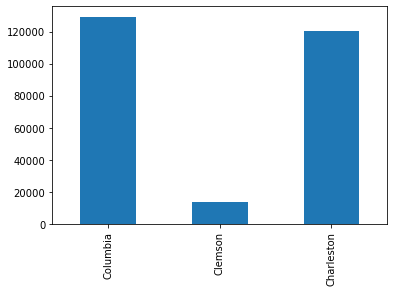

In [31]:
# Drop Missing Data
# ?cities.dropna
cities.dropna(inplace=True)
cities.plot.bar()

### DataFrame

When you have a deeper understanding of the `Series` data type, it should be easier to understand the `DataFrame` type. You can view a DataFrame as a dict of Series in which the column names are the keys and the Series as the values.



In [32]:
name = pd.Series(["Hunter Helms", "Trevor Lawrence", "Drew Swinney"])
position = pd.Series(["QB", "QB", "WR"])
height = pd.Series([6.1, 6.2, 5.10])
weight = pd.Series([210, 220, 180])
classes = pd.Series(["FR", "JR", "SO"])
df = pd.DataFrame({"name": name, 
                  "position": position,
                  "height": height,
                  "weight": weight,
                  "classes": classes})
df

,name,position,height,weight,classes
0,Hunter Helms,QB,6.1,210,FR
1,Trevor Lawrence,QB,6.2,220,JR
2,Drew Swinney,WR,5.1,180,SO


# Grammar of Data Manipulation

Formulated in dplyr, a data grammar provides a consistent set of verbs to abstract the most common set of data manipulation tasks. 

|    Verbs    |  dplyr     | pandas     | SQL  |
| ----------- | ---------- | ---------- | ---- |
| query/select| filter()/slice() | query(), loc[], iloc[] | SELECT WHERE |
| sort        | arrange()        | sort()                 | ORDER BY     |
| select-columns/projection | select() |  selection bracket, loc, iloc  | SELECT COLUMN|
| select-distinct | distinct() | unique(), dropy_duplicates() | SELECT DISTINCT COLUMN | 
| assign | mutate(), transmute() | assign() | ALTER/UPDATE |
| aggregate | summarize() | describe(), mean(), max(), etc. | AVG(), MAX() |
| sample | sample_n(), sample_frac() | sample() | RAND() |
| group-aggregate | group_by/summarize() | groupby/agg(), count(), mean() | GROUP BY|
| delete | | drop/masking | DELETE/WHERE|
